<a href="https://colab.research.google.com/github/matteo-psnt/Toyota-Innovation-Challenge/blob/main/Toyota_Innovation_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


OpenCV-Python Lib Version: 4.6.0
Python Version: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


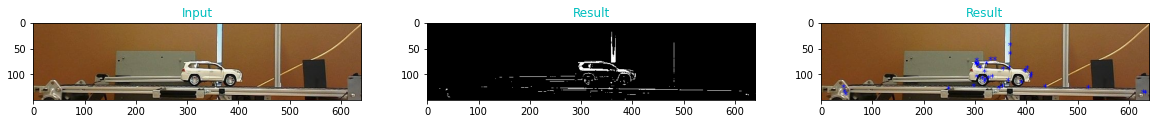

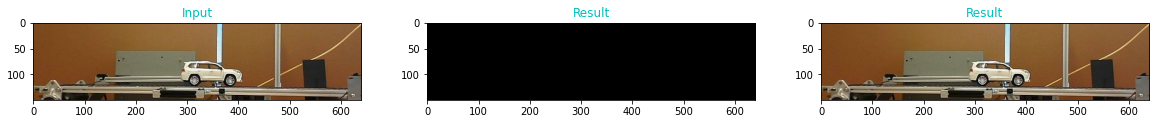

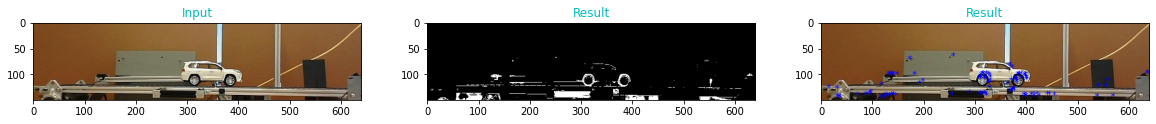

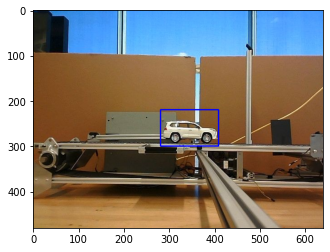

In [3]:
# CHALLENGE ONE - IMPORT PHOTO OF DESIRED CAR
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

#Get Python and OpenCV Version

print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

def detectAllColor(img_to_read,find_color=None):
  img = img_to_read
  cropped_img = img[170:320]
  color_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2HSV)

  #print(find_color)

  if find_color == "white":
      whiteUpper = np.array([0,0,220])
      whiteLower = np.array([180,30,255])

      img_mask_white = cv2.inRange(color_img,whiteUpper,whiteLower)
      return cropped_img, img_mask_white
  
  if find_color == "blue":
      blueUpper = np.array([112,50,50])
      blueLower = np.array([129,255,255])

      img_mask_blue = cv2.inRange(color_img,blueUpper,blueLower)
      return cropped_img, img_mask_blue

  if find_color == "black":
      blackUpper = np.array([0,0,0])
      blackLower = np.array([180,255,30])

      img_mask_black = cv2.inRange(color_img,blackUpper,blackLower)
      return cropped_img, img_mask_black


def showColors(og_img,masked_img):
    # Find Blue Contours
    (contours,_)=cv2.findContours(masked_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    FinImg = og_img.copy()
    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area):
            x,y,w,h = cv2.boundingRect(contour)
            # FinImg = cv2.rectangle(og_img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(FinImg,"*",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0))
            # BaseCord = np.array([x+h+round(w/2), y+h+round(w/2)])
    plt.figure(figsize=(20,10))
    plt.subplot(131),plt.imshow(cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.subplot(133),plt.imshow(cv2.cvtColor(FinImg,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return

img_to_read = cv2.imread("white_lexus_4.jpeg")

#img,new_img = detectAllColor(img_to_read,find_color='white')
imgWhite, new_img_white = detectAllColor(img_to_read,find_color='white')
imgBlue, new_img_blue = detectAllColor(img_to_read,find_color='blue')
imgBlack, new_img_black = detectAllColor(img_to_read,find_color='black')
#img_to_read here needs to be what the photo is 
#so, take the photo BEFORE these steps, and save it as img_to_read
showColors(imgWhite,new_img_white)
showColors(imgBlue,new_img_blue)
showColors(imgBlack,new_img_black)

new_img_white = cv2.cvtColor(new_img_white,cv2.COLOR_BGR2RGB)
new_img_blue = cv2.cvtColor(new_img_blue,cv2.COLOR_BGR2RGB)
new_img_black = cv2.cvtColor(new_img_black,cv2.COLOR_BGR2RGB)
#I need to decide which colour will be img and new_img

###########white contours#################
img_gray_white = cv2.cvtColor(new_img_white, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray_white, 150, 255, cv2.THRESH_BINARY)

#cv2.waitKey(0)
#cv2.imwrite('image_thres1.jpg', thresh)
#cv2.destroyAllWindows()

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contoursWhite, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy_white=imgWhite.copy()
cv2.drawContours(image=image_copy_white, contours=contoursWhite, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
#plt.imshow(image_copy_white)

#################blue contours###########################
img_gray_blue = cv2.cvtColor(new_img_blue, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray_blue, 150, 255, cv2.THRESH_BINARY)



# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contoursBlue, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy_blue=imgBlue.copy()
cv2.drawContours(image=image_copy_blue, contours=contoursBlue, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
#plt.imshow(image_copy_blue)

###################black contours#########################
img_gray_black = cv2.cvtColor(new_img_black, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray_black, 150, 255, cv2.THRESH_BINARY)



# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contoursBlack, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy_black=imgBlack.copy()
cv2.drawContours(image=image_copy_black, contours=contoursBlack, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
#plt.imshow(image_copy_black)

##############max contour##########################
cMaxSizeWhite = 0
cMaxWhite = np.empty([1,1,2])
for c in contoursWhite:
  if c.size >= cMaxSizeWhite:
    cMaxSizeWhite = c.size
    cMaxWhite = c
#print(len(cMaxWhite))

cMaxSizeBlue = 0
cMaxBlue = np.empty([1,1,2])
for c in contoursBlue:
  if c.size >= cMaxSizeBlue:
    cMaxSizeBlue = c.size
    cMaxBlue = c
#print(len(cMaxBlue))

cMaxSizeBlack = 0
cMaxBlack = np.empty([1,1,2])
for c in contoursBlack:
  if c.size >= cMaxSizeBlack:
    cMaxSizeBlack = c.size
    cMaxBlack = c
#print(len(cMaxBlack))

##################max contour comparison#########################
if len(cMaxWhite) > len(cMaxBlue) and len(cMaxWhite) > (len(cMaxBlack)-200):
  new_img = new_img_white
  img = imgWhite
  cMax = cMaxWhite
elif len(cMaxBlue) > len(cMaxWhite) and len(cMaxBlue) > (len(cMaxBlack)-200):
  new_img = new_img_blue
  img = imgBlue
  cMax = cMaxBlue
elif len(cMaxBlack) > len(cMaxWhite) and len(cMaxBlack) > (len(cMaxBlue)-200):
  new_img = new_img_black
  img =  imgBlack
  cMax = cMaxBlack

##################?????????????????##############################
img_gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy=img.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
plt.imshow(image_copy)

##################draw the box###################
x,y,w,h = cv2.boundingRect(cMax)
box = cv2.boxPoints(((x+51,y+15),(w+20,h+40),None))
box = np.int0(box)
  # draw contours
cv2.drawContours(img_to_read,[box],0,(255,0,0),2,None,None,None,(0,170))

plt.imshow(cv2.cvtColor(img_to_read,cv2.COLOR_BGR2RGB))
#displays the final result

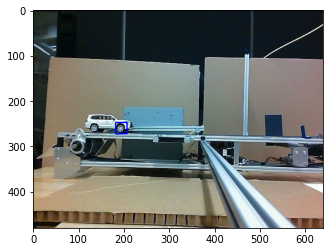

In [8]:
#CHALLENGE TWO - DETECT THE WHEEl - INPUT AN IMAGE
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from google.colab.patches import cv2_imshow


import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

import re
from os.path import isfile, join

#Get Python and OpenCV Version


from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

#INPUTTING IMAGE 

def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  #faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  #for (x,y,w,h) in faces:
  #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename
'''
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
'''

#CHANGE THIS IF YOU ARE TAKING A PHOTO
img_to_read = cv2.imread("/content/white_lexus_1.jpeg")

######################COLOUR DETECTION- DOWN#########################

def detectAllColor(img_to_read,find_color=None):
  img = img_to_read
  cropped_img = img[170:320]
  color_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2HSV)

  if find_color == "white":
    whiteUpper = np.array([0,0,220])
    whiteLower = np.array([180,30,255])

    img_mask = cv2.inRange(color_img,whiteUpper,whiteLower)
    return cropped_img, img_mask
  
  if find_color == "blue":
    blueUpper = np.array([112,50,50])
    blueLower = np.array([129,255,255])

    img_mask = cv2.inRange(color_img,blueUpper,blueLower)
    return cropped_img, img_mask

  if find_color == "black":
    blackUpper = np.array([0,0,0])
    blackLower = np.array([180,255,30])

    img_mask = cv2.inRange(color_img,blackUpper,blackLower)
    return cropped_img, img_mask

############CONTOUR SELECTION -DOWN###############
def choose_color(img_to_read):
  imgWhite, new_img_white = detectAllColor(img_to_read,find_color='white')
  imgBlue, new_img_blue = detectAllColor(img_to_read,find_color='blue')
  imgBlack, new_img_black = detectAllColor(img_to_read,find_color='black')
  #img_to_read here needs to be what the photo is 

  new_img_white = cv2.cvtColor(new_img_white,cv2.COLOR_BGR2RGB)
  new_img_blue = cv2.cvtColor(new_img_blue,cv2.COLOR_BGR2RGB)
  new_img_black = cv2.cvtColor(new_img_black,cv2.COLOR_BGR2RGB)
  #I need to decide which colour will be img and new_img
  ###########white contours#################
  img_gray_white = cv2.cvtColor(new_img_white, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

  # apply binary thresholding
  ret, thresh = cv2.threshold(img_gray_white, 150, 255, cv2.THRESH_BINARY)

  #cv2.waitKey(0)
  #cv2.imwrite('image_thres1.jpg', thresh)
  #cv2.destroyAllWindows()

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contoursWhite, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                        
  # draw contours on the original image
  image_copy_white=imgWhite.copy()
  cv2.drawContours(image=image_copy_white, contours=contoursWhite, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                  
  # see the results
  #plt.imshow(image_copy_white)

  #################blue contours###########################
  img_gray_blue = cv2.cvtColor(new_img_blue, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

  # apply binary thresholding
  ret, thresh = cv2.threshold(img_gray_blue, 150, 255, cv2.THRESH_BINARY)

  #cv2.waitKey(0)
  #cv2.imwrite('image_thres1.jpg', thresh)
  #cv2.destroyAllWindows()

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contoursBlue, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                        
  # draw contours on the original image
  image_copy_blue=imgBlue.copy()
  cv2.drawContours(image=image_copy_blue, contours=contoursBlue, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                  
  # see the results
  #plt.imshow(image_copy_blue)

  ###################black contours#########################
  img_gray_black = cv2.cvtColor(new_img_black, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

  # apply binary thresholding
  ret, thresh = cv2.threshold(img_gray_black, 150, 255, cv2.THRESH_BINARY)

  #cv2.waitKey(0)
  #cv2.imwrite('image_thres1.jpg', thresh)
  #cv2.destroyAllWindows()

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contoursBlack, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                        
  # draw contours on the original image
  image_copy_black=imgBlack.copy()
  cv2.drawContours(image=image_copy_black, contours=contoursBlack, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                  
  # see the results
  #plt.imshow(image_copy_black)

  ##############max contour##########################
  cMaxSizeWhite = 0
  cMaxWhite = np.empty([1,1,2])
  for c in contoursWhite:
    #print("cMax\n",cMax)
    #print("c\n",c)
    if c.size >= cMaxSizeWhite:
      cMaxSizeWhite = c.size
      cMaxWhite = c
  #print(len(cMaxWhite))

  cMaxSizeBlue = 0
  cMaxBlue = np.empty([1,1,2])
  for c in contoursBlue:
    #print("cMax\n",cMax)
    #print("c\n",c)
    if c.size >= cMaxSizeBlue:
      cMaxSizeBlue = c.size
      cMaxBlue = c
  #print(len(cMaxBlue))

  cMaxSizeBlack = 0
  cMaxBlack = np.empty([1,1,2])
  for c in contoursBlack:
    #print("cMax\n",cMax)
    #print("c\n",c)
    if c.size >= cMaxSizeBlack:
      cMaxSizeBlack = c.size
      cMaxBlack = c
  #print(len(cMaxBlack))

  ##################max contour comparison#########################
  if len(cMaxWhite) > len(cMaxBlue) and len(cMaxWhite) > (len(cMaxBlack)-200):
    new_img = new_img_white
    img = imgWhite
    cMax = cMaxWhite
  elif len(cMaxBlue) > len(cMaxWhite) and len(cMaxBlue) > (len(cMaxBlack)-200):
    new_img = new_img_blue
    img = imgBlue
    cMax = cMaxBlue
  elif len(cMaxBlack) > len(cMaxWhite) and len(cMaxBlack) > (len(cMaxBlue)-200):
    new_img = new_img_black
    img =  imgBlack
    cMax = cMaxBlack
  
  return new_img, img, cMax


from google.colab.patches import cv2_imshow


'''
cap = cv2.VideoCapture('/content/white_lexus_1.mp4')
# cap = cv2.VideoCapture('video.mp4')

video = []


while cap.isOpened():

    ret, frame = cap.read()

    video.append(frame)
    # if frame is read correctly ret is True
    if not ret:
        break
'''


def procces(video_img):
  image, img, cMax = choose_color(video_img)

  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # apply binary thresholding
  ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
  # visualize the binary image

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                        
  # draw contours on the original image
  image_c = img.copy()

  cv2.drawContours(image=image_c, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
       
  # see the results

  x,y,w,h = cv2.boundingRect(cMax)
  box = cv2.boxPoints(((x+78,y+30),(25,25),None))
  box = np.int0(box)
    # draw contours
  cv2.drawContours(video_img,[box],0,(255,0,0),2,None,None,None,(0,170))
  return video_img, x



#img_to_read = cv2.imread("black_lexus_1.jpeg")
img_to_read, x = procces(img_to_read)
plt.imshow(cv2.cvtColor(img_to_read, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
#CHALLENGE THREE - DETECT THE FRONT WHEEl
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from google.colab.patches import cv2_imshow


import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

import re
from os.path import isfile, join

#Get Python and OpenCV Version


from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def re_encode_video(video_path):
    print(f"Re-encoding video, this might take some time, please be patient.")
    #added -r 30, otherwise, for some reason it records 1000FPS as metadata for the Astra
    os.system(f"ffmpeg -y -i {video_path} -vcodec libx264 -r 30 temp.mp4")
    os.system(f"rm {video_path}")
    os.system(f"mv temp.mp4 {video_path}")
    print(f"Done encoding!")
    
def record_video(filename='video.mp4'):
  js = Javascript("""
    async function recordVideo() {
      // mashes together the advanced_outputs.ipynb function provided by Colab, 
      // a bunch of stuff from Stack overflow, and some sample code from:
      // https://developer.mozilla.org/en-US/docs/Web/API/MediaStream_Recording_API

      // Optional frames per second argument.
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // create a media recorder instance, which is an object
      // that will let you record what you stream.
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      // Video is a media element.  This line here sets the object which serves
      // as the source of the media associated with the HTMLMediaElement
      // Here, we'll set it equal to the stream.
      video.srcObject = stream;
      // We're inside an async function, so this await will fire off the playing
      // of a video. It returns a Promise which is resolved when playback has 
      // been successfully started. Since this is async, the function will be 
      // paused until this has started playing. 
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // and now, just wait for the capture button to get clicked in order to
      // start recording
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      // use a promise to tell it to stop recording
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);
    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
    '''
    unfortunately, webcam capture is not that clean in Colab and the videos need to
    be re-encoded to play properly. This takes some time.
    '''
    re_encode_video(filename)
  except Exception as err:
      # In case any exceptions arise
      print(str(err))
  return filename


# records video

record_video("video.mp4")

######################COLOUR DETECTION- DOWN#########################

def detectAllColor(img_to_read,find_color=None):
  img = img_to_read
  cropped_img = img[170:320]
  color_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2HSV)

  if find_color == "white":
    whiteUpper = np.array([0,0,220])
    whiteLower = np.array([180,30,255])

    img_mask = cv2.inRange(color_img,whiteUpper,whiteLower)
    return cropped_img, img_mask
  
  if find_color == "blue":
    blueUpper = np.array([112,50,50])
    blueLower = np.array([129,255,255])

    img_mask = cv2.inRange(color_img,blueUpper,blueLower)
    return cropped_img, img_mask

  if find_color == "black":
    blackUpper = np.array([0,0,0])
    blackLower = np.array([180,255,30])

    img_mask = cv2.inRange(color_img,blackUpper,blackLower)
    return cropped_img, img_mask

############CONTOUR SELECTION -DOWN###############
def choose_color(img_to_read):
  imgWhite, new_img_white = detectAllColor(img_to_read,find_color='white')
  imgBlue, new_img_blue = detectAllColor(img_to_read,find_color='blue')
  imgBlack, new_img_black = detectAllColor(img_to_read,find_color='black')
  #img_to_read here needs to be what the photo is 

  new_img_white = cv2.cvtColor(new_img_white,cv2.COLOR_BGR2RGB)
  new_img_blue = cv2.cvtColor(new_img_blue,cv2.COLOR_BGR2RGB)
  new_img_black = cv2.cvtColor(new_img_black,cv2.COLOR_BGR2RGB)
  #I need to decide which colour will be img and new_img
  ###########white contours#################
  img_gray_white = cv2.cvtColor(new_img_white, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

  # apply binary thresholding
  ret, thresh = cv2.threshold(img_gray_white, 150, 255, cv2.THRESH_BINARY)

  #cv2.waitKey(0)
  #cv2.imwrite('image_thres1.jpg', thresh)
  #cv2.destroyAllWindows()

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contoursWhite, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                        
  # draw contours on the original image
  image_copy_white=imgWhite.copy()
  cv2.drawContours(image=image_copy_white, contours=contoursWhite, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                  
  # see the results
  #plt.imshow(image_copy_white)

  #################blue contours###########################
  img_gray_blue = cv2.cvtColor(new_img_blue, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

  # apply binary thresholding
  ret, thresh = cv2.threshold(img_gray_blue, 150, 255, cv2.THRESH_BINARY)

  #cv2.waitKey(0)
  #cv2.imwrite('image_thres1.jpg', thresh)
  #cv2.destroyAllWindows()

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contoursBlue, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                        
  # draw contours on the original image
  image_copy_blue=imgBlue.copy()
  cv2.drawContours(image=image_copy_blue, contours=contoursBlue, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                  
  # see the results
  #plt.imshow(image_copy_blue)

  ###################black contours#########################
  img_gray_black = cv2.cvtColor(new_img_black, cv2.COLOR_BGR2GRAY) #the photo is already gray, however it has two columns are therefore wont work for finding the contours

  # apply binary thresholding
  ret, thresh = cv2.threshold(img_gray_black, 150, 255, cv2.THRESH_BINARY)

  #cv2.waitKey(0)
  #cv2.imwrite('image_thres1.jpg', thresh)
  #cv2.destroyAllWindows()

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contoursBlack, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                        
  # draw contours on the original image
  image_copy_black=imgBlack.copy()
  cv2.drawContours(image=image_copy_black, contours=contoursBlack, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                  
  # see the results
  #plt.imshow(image_copy_black)

  ##############max contour##########################
  cMaxSizeWhite = 0
  cMaxWhite = np.empty([1,1,2])
  for c in contoursWhite:
    #print("cMax\n",cMax)
    #print("c\n",c)
    if c.size >= cMaxSizeWhite:
      cMaxSizeWhite = c.size
      cMaxWhite = c
  #print(len(cMaxWhite))

  cMaxSizeBlue = 0
  cMaxBlue = np.empty([1,1,2])
  for c in contoursBlue:
    #print("cMax\n",cMax)
    #print("c\n",c)
    if c.size >= cMaxSizeBlue:
      cMaxSizeBlue = c.size
      cMaxBlue = c
  #print(len(cMaxBlue))

  cMaxSizeBlack = 0
  cMaxBlack = np.empty([1,1,2])
  for c in contoursBlack:
    #print("cMax\n",cMax)
    #print("c\n",c)
    if c.size >= cMaxSizeBlack:
      cMaxSizeBlack = c.size
      cMaxBlack = c
  #print(len(cMaxBlack))

  ##################max contour comparison#########################
  if len(cMaxWhite) > len(cMaxBlue) and len(cMaxWhite) > (len(cMaxBlack)-200):
    new_img = new_img_white
    img = imgWhite
    cMax = cMaxWhite
  elif len(cMaxBlue) > len(cMaxWhite) and len(cMaxBlue) > (len(cMaxBlack)-200):
    new_img = new_img_blue
    img = imgBlue
    cMax = cMaxBlue
  elif len(cMaxBlack) > len(cMaxWhite) and len(cMaxBlack) > (len(cMaxBlue)-200):
    new_img = new_img_black
    img =  imgBlack
    cMax = cMaxBlack
  
  return new_img, img, cMax


from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('/content/white_lexus_1.mp4')
# cap = cv2.VideoCapture('video.mp4')

video = []


while cap.isOpened():

    ret, frame = cap.read()

    video.append(frame)
    # if frame is read correctly ret is True
    if not ret:
        break
        
def procces(video_img):
  image, img, cMax = choose_color(video_img)

  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # apply binary thresholding
  ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
  # visualize the binary image

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                        
  # draw contours on the original image
  image_c = img.copy()

  cv2.drawContours(image=image_c, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
       
  # see the results

  x,y,w,h = cv2.boundingRect(cMax)
  box = cv2.boxPoints(((x+78,y+30),(25,25),None))
  box = np.int0(box)
    # draw contours
  cv2.drawContours(video_img,[box],0,(255,0,0),2,None,None,None,(0,170))
  return video_img, x + 78

# adds box to image
detect_vid = []
for i in range(len(video) - 1):
  frame, x = procces(video[i])
  if (x > 362 and x < 372):
    middle_img = frame
  detect_vid.append(frame)

height, width, layers = detect_vid[0].shape


fourcc = cv2.VideoWriter_fourcc(*'MP4V')

out = cv2.VideoWriter('video_c.mp4',fourcc, 30, (width, height))

for i in range(len(detect_vid)):
    rgb_img = detect_vid[i]
    out.write(rgb_img)
out.release()

# Run the function, get the video path as saved in your notebook, and play it back here.
from IPython.display import HTML
from base64 import b64encode
from IPython.display import display, Javascript
from google.colab.output import eval_js

def re_encode_video(video_path):
    print(f"Re-encoding video, this might take some time, please be patient.")
    #added -r 30, otherwise, for some reason it records 1000FPS as metadata for the Astra
    os.system(f"ffmpeg -y -i {video_path} -vcodec libx264 -r 30 temp.mp4")
    os.system(f"rm {video_path}")
    os.system(f"mv temp.mp4 {video_path}")
    print(f"Done encoding!")

def show_video(video_path, video_width = 640, reencode = False):
  
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
video_path = "video_c.mp4"
re_encode_video(video_path)
show_video(video_path, video_width = width)





<IPython.core.display.Javascript object>

Finished recording video. Saved binary under filename in current working directory: video.mp4
Re-encoding video, this might take some time, please be patient.
Done encoding!
Re-encoding video, this might take some time, please be patient.
Done encoding!


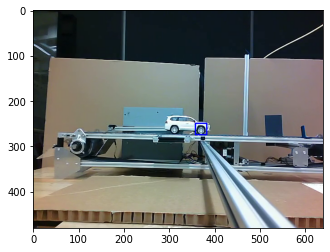

In [15]:
#CHALLENGE FOUR - SCREENSHOT WHEN FRONT WHEEL IS CENTERED ON VERTICAL EXTRUSION
try:
  plt.imshow(cv2.cvtColor(middle_img, cv2.COLOR_BGR2RGB))
  plt.show()
except:
  print("Did not detect front wheel centered on vertical extrusion")